<a href="https://colab.research.google.com/github/cbachen1997/PythonStudy/blob/master/LogReCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#挂载谷歌云盘
from google.colab import drive
drive.mount('/content/gdrive')
#更改运行目录
import os
os.chdir("/content/gdrive/My Drive/AndrewNgTest/week2-LogisticRegression")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
####google云盘授权#####
##每个notebook执行一次###
__author__='CBA'
from google.colab import drive

#增加PyDrive操作库
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#授权登录
auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py#处理h5数据集
from lr_utils import load_dataset

In [ ]:
train_x,train_y,test_x,test_y,classes=load_dataset()
#train_x中有209张64X64的图像
#train_y保存的0|1的标签，1是猫，0不是
#test_x有50张64X64
#classes保存用bytes类型的字符串数据，b'non-cat',b'cat'

In [ ]:
#show img
index=7
plt.imshow(train_x[index])

In [ ]:
print("y=" + str(train_y[:,index]) + ", it's a " + classes[np.squeeze(train_y[:,index])].decode("utf-8") + "' picture")
#np.squeeze压缩维度，压缩后维度为1的消失，
#classes[]需要一个数字，而不是数组

In [ ]:
m_train = train_x.shape[0] #训练集里图片的数量。
m_test = test_x.shape[0] #测试集里图片的数量。
num_px = train_x.shape[1] #训练、测试集里面的图片的宽度和高度（均为64x64）。

print ("训练集的数量: m_train = " + str(m_train))
print ("测试集的数量 : m_test = " + str(m_test))
print ("每张图片的宽/高 : num_px = " + str(num_px))
print ("每张图片的大小 : (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("训练集_图片的维数 : " + str(train_x.shape))
print ("训练集_标签的维数 : " + str(train_y.shape))
print ("测试集_图片的维数: " + str(test_x.shape))
print ("测试集_标签的维数: " + str(test_y.shape))

In [48]:
#数据降维，获得数据列向量，209张，每张64X64X3的特征。
#将(数量，长，宽，高)平铺成（长X宽X高，数量）
train_x_flatten=train_x.reshape(train_x.shape[0],-1).T
test_x_flatten=test_x.reshape(-1,test_x.shape[0])

In [ ]:
#data normalize
trainset_x=train_x_flatten/255.0
testset_x=test_x_flatten/255.0
testset_x.shape

In [53]:
#构建神经网络
#z=wx+b,此处x为trainset_x
#a=sigmoid(z)
#loss=L(a,y)
#J=-1/m(求和)(yloga+(1-y)log(1-a))'

In [54]:
def sigmoid(z):
  """
  parameters:
    z - 任意大小的数组
  return:
    s - sigmoid结果
  """
  s = 1/(1+np.exp(-z))
  return s
#测试sigmoid
assert(sigmoid(0)==0.5)
sigmoid(9.2)==0.9998989708060922

In [63]:
#初始化参数(w,b)
def initialize_wb(dim):
  """
  将w创建为(dim,1)的0向量，b初始化为0
  参数：
          dim  - 我们想要的w矢量的大小（或者这种情况下的参数数量）
      
      返回：
          w  - 维度为（dim，1）的初始化向量。
          b  - 初始化的标量（对应于偏差）
  """
  w=np.zeros((dim,1))
  b=0
  assert(w.shape == (dim, 1)) #w的维度是(dim,1)
  assert(isinstance(b, float) or isinstance(b, int)) #b的类型是float或者是int

  return (w,b)

In [93]:
#构建正向传播函数
def propagate(w,b,X,Y):
    """
    实现前向和后向传播的成本函数及其梯度。
    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 矩阵类型为（num_px * num_px * 3，训练数量）
        Y  - 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据数量)

    返回：
        cost- 逻辑回归的负对数似然成本
        dw  - 相对于w的损失梯度，因此与w相同的形状
        db  - 相对于b的损失梯度，因此与b的形状相同
    """
    m=X.shape[1]
  
    #正向传播
    A = sigmoid(np.dot(w.T,X)+b)

    cost=(-1.0/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))

    #反向传播
    dw=(1.0/m)*np.dot(X,(A-Y).T)#A-Y为dz
    db=(1.0/m)*np.sum(A-Y)

    #使用断言确保我的数据是正确的
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    #创建一个字典，把dw和db保存起来。
    grads = {
                "dw": dw,
                "db": db
             }
    return (grads , cost)

In [95]:
#测试正向传播
print('================Testing==============')
#初始化参数
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))



================Testing==============
dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [102]:
#优化参数
def optimize(w,b,X,Y,num_iter,epsilon,print_cost=True):
    """
    此函数通过运行梯度下降算法来优化w和b
    
    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 维度为（num_px * num_px * 3，训练数据的数量）的数组。
        Y  - 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据的数量)
        num_iterations  - 优化循环的迭代次数
        epsilon  - 梯度下降更新规则的学习率
        print_cost  - 每100步打印一次损失值
    
    返回：
        params  - 包含权重w和偏差b的字典
        grads  - 包含权重和偏差相对于成本函数的梯度的字典
        成本 - 优化期间计算的所有成本列表，将用于绘制学习曲线。
    
    提示：
    我们需要写下两个步骤并遍历它们：
        1）计算当前参数的成本和梯度，使用propagate（）。
        2）使用w和b的梯度下降法则更新参数。
    """
    costs=[]
    #最外层训练，训练次数
    for i in range(num_iter):
      grads,cost=propagate(w,b,X,Y)
      dw = grads["dw"]
      db = grads["db"]
      #梯度下降
      w = w - epsilon * dw
      b = b - epsilon * db
      #记录成本,每100次获得一次成本
      if i % 100 == 0:
          costs.append(cost)
      #打印成本数据
      if (print_cost) and (i % 100 == 0):
          print("迭代的次数: %i ， 误差值： %f" % (i,cost))
    #保存w,b和dw,db
         
    params  = {
                "w" : w,
                "b" : b }
    grads = {
            "dw": dw,
            "db": db }
    return (params , grads , costs)

In [ ]:
#测试optimize
print("====================测试optimize====================")
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
params , grads , costs = optimize(w , b , X , Y ,100 , epsilon = 0.009 , print_cost = True)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print (str(costs))

In [136]:
#已经会输出已学习到的w,b，利用梯度下降后更新的w,b下面完成预测。
def predict(w,b,X):
  """
  使用学习逻辑回归参数logistic （w，b）预测标签是0还是1，
  
  参数：
      w  - 权重，大小不等的数组（num_px * num_px * 3，1）
      b  - 偏差，一个标量
      X  - 维度为（num_px * num_px * 3，训练数据的数量）的数据
  
  返回：
      Y_prediction  - 包含X中所有图片的所有预测【0 | 1】的一个numpy数组（向量）
  
  """
  m=X.shape[1] 
  Y_prediction=np.zeros((1,m))#m张预测结果
  w=w.reshape(X.shape[0],1)#变为X维度行，1列的向量
  #计预测猫在图片中出现的概率
  A = sigmoid(np.dot(w.T , X) + b)
  for i in range(A.shape[1]):
      #将概率a [0，i]转换为实际预测p [0，i]
      #print(A[0,i])
      Y_prediction[0,i] = 1 if A[0,i] > 0.5 else 0
  #使用断言
  assert(Y_prediction.shape == (1,m))

  return Y_prediction

In [138]:
#模型整合
def model(X_train , Y_train , X_test , Y_test , num_iterations = 2000 , learning_rate = 0.5 , print_cost = False):
    """
    通过调用之前实现的函数来构建逻辑回归模型
    
    参数：
        X_train  - numpy的数组,维度为（num_px * num_px * 3，m_train）的训练集
        Y_train  - numpy的数组,维度为（1，m_train）（矢量）的训练标签集
        X_test   - numpy的数组,维度为（num_px * num_px * 3，m_test）的测试集
        Y_test   - numpy的数组,维度为（1，m_test）的（向量）的测试标签集
        num_iterations  - 表示用于优化参数的迭代次数的超参数
        learning_rate  - 表示optimize（）更新规则中使用的学习速率的超参数
        print_cost  - 设置为true以每100次迭代打印成本
    
    返回：
        d  - 包含有关模型信息的字典。
    """
    #1.初始化w,b，利用归一化的特征结果！
    w,b=initialize_wb(trainset_x.shape[0])
    #2.获得参数，梯度，成本
    parameters , grads , costs = optimize(w , b , X_train , Y_train,num_iterations , learning_rate , print_cost)
    #从字典“参数”中检索参数w和b
    w , b = parameters["w"] , parameters["b"]

    #3.测试
    Y_prediction_test = predict(w , b, X_test)
    #print(Y_prediction_test)
    #print(Y_test)
    print("测试集准确性："  , format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100) ,"%")
    d = {
            "costs" : costs,
            "Y_prediction_test" : Y_prediction_test,
            "w" : w,
            "b" : b,
            "learning_rate" : learning_rate,
            "num_iterations" : num_iterations }
    return d


In [ ]:
#最终测试
result=model(trainset_x,train_y,testset_x,test_y,num_iterations=1000,learning_rate=0.01,print_cost=True)

In [ ]:
#绘制图
costs=np.squeeze(result['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(result["learning_rate"]))
plt.show()

learning rate is: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply


测试集准确性： 66.0 %

-------------------------------------------------------

learning rate is: 0.5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


测试集准确性： 66.0 %

-------------------------------------------------------

learning rate is: 0.05
测试集准确性： 66.0 %

-------------------------------------------------------

learning rate is: 0.005
测试集准确性： 66.0 %

-------------------------------------------------------



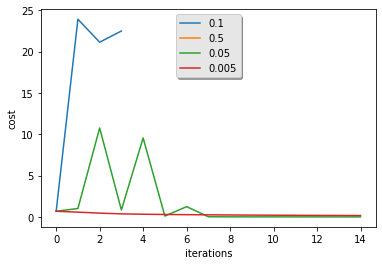

In [139]:
#比较学习率
learning_rates=[0.1,0.5,0.05,0.005]
models = {}
for i in learning_rates:
  print ("learning rate is: " + str(i))
  models[str(i)] = model(trainset_x,train_y,testset_x,test_y, num_iterations = 1500, learning_rate = i, print_cost = False)
  print ('\n' + "-------------------------------------------------------" + '\n')
for i in learning_rates:
  plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()